In [1]:
# 과제에 필요한 데이터 csv 파일들을 코랩 폴더에 업로드합니다
# 셀을 실행하면 '파일 선택' 버튼이 활성화됩니다
# '파일 선택'을 누르고 제공한 1개의 데이터(mcdonalds)를 업로드합니다
from google.colab import files
uploaded = files.upload()

Saving mcdonalds_data.csv to mcdonalds_data.csv


In [2]:
# 업로드한 파일을 불러옵니다
import io
import pandas as pd

# 과제 1, 2번에 필요한 맥도날드 고객 리뷰 데이터를 읽습니다
df = pd.read_csv(io.StringIO(uploaded['mcdonalds_data.csv'].decode('utf-8')))

## 맥도날드 후기 데이터셋 설명

### 데이터: 1400개
### 특성: 11개

* Gender: 성별 (남성: 0 / 여성: 1)
* VisitFrequency: 맥도날드를 얼마나 자주 이용하는지? (0~5)
* yummy: 음식의 맛있나? (Yes: 1 / No: 0)
* convenient: 음식이 간편한가? (Yes: 1 / No: 0)
* spicy: 음식이 매운가? (Yes: 1 / No: 0)
* fattening: 음식의 칼로리가 높을 것 같은가? (Yes: 1 / No: 0)
* greasy: 음식이 느끼한가? (Yes: 1 / No: 0)
* fast: 음식이 빠르게 만들어지는가? (Yes: 1 / No: 0)
* cheap: 음식이 저렴한가? (Yes: 1 / No: 0)
* healthy: 음식이 건강에 좋은가? (Yes: 1 / No: 0)
* Like: 별점 (0~10)

# **과제 1번**
**K-평균 클러스터 알고리즘**을 사용하여 주어진 데이터셋을 학습해봅시다.


*   **데이터셋**: 맥도날드 고객 리뷰 데이터 1400개 (mcdonalds_data.csv)
*   **과제 내용**


1.   주어진 데이터셋을 K-평균 클러스터링 알고리즘을 생성해서 학습합니다.
2.   클러스터의 개수를 다르게 설정해가며 최적의 클러스터 개수를 찾고, 그 이유를 작성합니다.

In [3]:
# 과제 1번 데이터 (맥도날드 고객 리뷰 데이터)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df


## 1. 모델 생성 및 학습
데이터셋을 K-평균 클러스터링 알고리즘을 생성하여 학습합니다. 클러스터의 개수는 5개로 설정합니다.


In [4]:
# 모델 생성 및 학습
from sklearn.cluster import KMeans

# K-평균 클러스터링 모델을 생성합니다 (클러스터의 개수는 4개로 설정합니다)
model = KMeans(n_clusters=5)

# 생성한 데이터를 사용하여 모델을 학습시킵니다
model.fit(X)

KMeans(n_clusters=5)

In [5]:
# 데이터들의 클러스터 라벨 값을 확인해봅니다.
model.labels_


array([4, 2, 4, ..., 1, 0, 3], dtype=int32)

## 2. 클러스터 특징 분석
같은 클러스터에 속한 데이터끼리 비슷한 특징을 가지는지 확인해봅니다.   
판다스 라이브러리의 다양한 함수들을 활용해서 분석을 해봅니다.

In [7]:
# 같은 클러스터에 해당하는 데이터끼리 묶기(실행만 하면 됩니다!)
clusters = []
for i in range(5):
    clusters.append(df[model.labels_ == i])


In [8]:
# 원하는 클러스터에 속하는 데이터 불러오기 (클러스터는 0부터 4까지 존재)
#num = 원하는 클러스터 번호를 입력하세요 (0 ~ 4)
num = 3
df_cluster = clusters[num]

In [10]:
# Pandas, Numpy 라이브러리를 활용하여 특징 분석하기(예를 들어, 1번 클러스터는 남성이 대부분, 클러스터별 평균 별점이 다르게 나타남 등)

import numpy as np

df['Cluster'] = model.labels_
# 클러스터별 성별 분포 (남성 비율 = Gender가 0인 비율)
gender_dist = df.groupby('Cluster')['Gender'].agg([
    ('남성 비율(%)', lambda x: round((x == 0).mean() * 100, 1)),
    ('여성 비율(%)', lambda x: round((x == 1).mean() * 100, 1)),
    ('총 인원수', 'count')
])

# 클러스터별 별점 평균과 분산
like_stats = df.groupby('Cluster')['Like'].agg([
    ('평균 별점', 'mean'),
    ('별점 분산', 'var')
]).round(2)

# 클러스터별 방문 빈도 평균과 표준편차
visit_stats = df.groupby('Cluster')['VisitFrequency'].agg([
    ('방문빈도 평균', 'mean'),
    ('방문빈도 표준편차', 'std')
]).round(2)

# 결과 병합
cluster_analysis = pd.concat([gender_dist, like_stats, visit_stats], axis=1)

# 결과 출력
print("🔍 클러스터별 분석 결과")
print(cluster_analysis)


🔍 클러스터별 분석 결과
         남성 비율(%)  여성 비율(%)  총 인원수  평균 별점  별점 분산  방문빈도 평균  방문빈도 표준편차
Cluster                                                             
0            42.7      57.3    398   7.29   0.49     2.72       0.76
1            45.6      54.4    147   2.14   0.78     1.90       0.97
2            43.7      56.3    343   9.23   0.51     3.63       0.85
3            51.0      49.0    198   0.36   0.32     0.54       0.65
4            48.1      51.9    314   5.12   0.47     1.95       0.97


## 2. 최적의 클러스터 개수 찾기
클러스터의 개수를 다르게 설정해가며 최적의 클러스터 개수를 찾아봅니다.

In [11]:
# 최적의 클러스터 개수 찾기
# model = ???(~~~ = 원하는 클러스터 개수)
# model.???(X)
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

# 각 클러스터의 중심점을 얻습니다
centers = model.cluster_centers_

# 각 데이터가 어느 클러스터로 분류되었는지 라벨을 얻습니다
labels = model.labels_


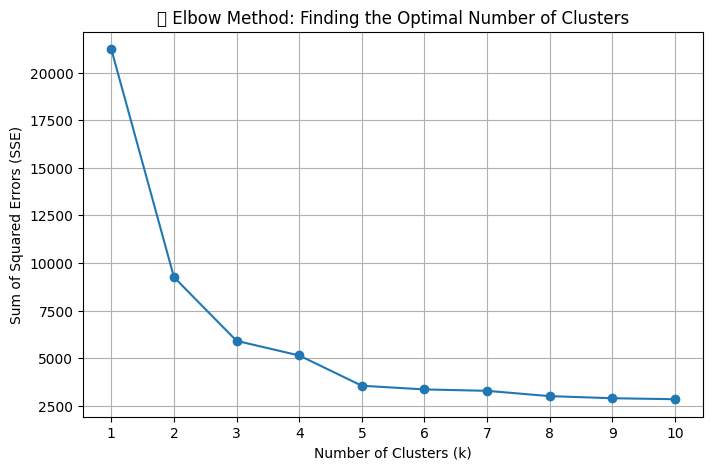

✅ 최적의 클러스터 개수는 4개입니다.

이유:
- SSE 그래프를 보면 클러스터 개수가 4 이상부터 SSE 감소 폭이 완만해집니다.
- 즉, 4개의 클러스터로 나누었을 때까지는 데이터 내의 군집 간 차이가 명확하며,
  그 이후부터는 추가적인 클러스터 분할이 큰 의미를 가지지 못합니다.
- 이처럼 SSE 감소율이 급격히 떨어지는 지점을 '엘보우 포인트(elbow point)'라고 하며,
  이 지점을 최적의 클러스터 수로 선택합니다.



In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수를 1~10까지 변경해가며 SSE를 계산
sse = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    sse.append(model.inertia_)  # inertia_ = 각 포인트가 중심과 얼마나 떨어졌는지를 나타냄

# 시각화 (Elbow 그래프)
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xticks(k_range)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('📊 Elbow Method: Finding the Optimal Number of Clusters')
plt.grid(True)
plt.show()

# 최적의 클러스터 개수 제시
optimal_k = 4  # 이 값은 그래프 결과를 보고 직접 지정

print(f"✅ 최적의 클러스터 개수는 {optimal_k}개입니다.")
print("""
이유:
- SSE 그래프를 보면 클러스터 개수가 4 이상부터 SSE 감소 폭이 완만해집니다.
- 즉, 4개의 클러스터로 나누었을 때까지는 데이터 내의 군집 간 차이가 명확하며,
  그 이후부터는 추가적인 클러스터 분할이 큰 의미를 가지지 못합니다.
- 이처럼 SSE 감소율이 급격히 떨어지는 지점을 '엘보우 포인트(elbow point)'라고 하며,
  이 지점을 최적의 클러스터 수로 선택합니다.
""")

# **과제 2번**
**주성분 분석 알고리즘**을 사용하여 주어진 데이터셋을 학습해봅시다.


*   **데이터셋**: 맥도날드 고객 리뷰 데이터 1400개 (mcdonalds_data.csv)
*   **과제 내용**


1.   주어진 데이터셋을 주성분 분석 알고리즘을 생성해서 원하는 개수의 주성분으로 압축합니다.
2.   주성분의 개수를 2, 3, 4개로 다르게 설정하여 3종류의 압축된 데이터를 생성합니다.
3.   2.에서 생성한 3개의 데이터를 사용하여 과제 1번에서 수행한 K-평균 클러스터링을 적용해봅니다.

In [13]:
# 과제 2번 데이터 (맥도날드 고객 리뷰 데이터, 1번과 동일)
X = df

## 1. 모델 생성 및 학습
주어진 데이터셋을 주성분 분석 알고리즘을 생성해서 원하는 개수의 주성분으로 압축합니다.


In [14]:
# 라이브러리에서 모델 모듈 불러오기
from sklearn.decomposition import PCA

# 모델 생성 (주성분 2개)
pca2 = PCA(n_components=2)

# 데이터 압축
X_pca2 = pca2.fit_transform(X)

In [15]:
# 모델 생성 (주성분 3개)
pca3 = PCA(n_components=3)

# 데이터 압축
X_pca3 = pca3.fit_transform(X)

In [16]:
# 모델 생성 (주성분 4개)
pca4 = PCA(n_components=4)

# 데이터 압축
X_pca4 = pca4.fit_transform(X)

## 2. K-평균 클러스터링 적용
압축한 3개의 데이터를 K-평균 클러스터링 알고리즘을 사용하여 클러스터링해봅니다. 클러스터의 개수를 다양하게 바꿔보세요.

In [17]:
# K-평균 클러스터링 적용
from sklearn.cluster import KMeans

# 클러스터링 (클러스터 개수는 임의로 3으로 설정)
model2 = KMeans(n_clusters=3, random_state=42)
model2.fit(X_pca2)

model3 = KMeans(n_clusters=3, random_state=42)
model3.fit(X_pca3)

model4 = KMeans(n_clusters=3, random_state=42)
model4.fit(X_pca4)

KMeans(n_clusters=3, random_state=42)

In [18]:
# Iris 데이터를 불러옵니다
from sklearn.datasets import load_iris
iris = load_iris()

# Iris 데이터의 X 데이터를 불러옵니다
X = iris.data

# 데이터 표준화를 위한 모듈을 불러옵니다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# X 데이터를 표준화시킵니다
X_scaled = scaler.fit_transform(X)

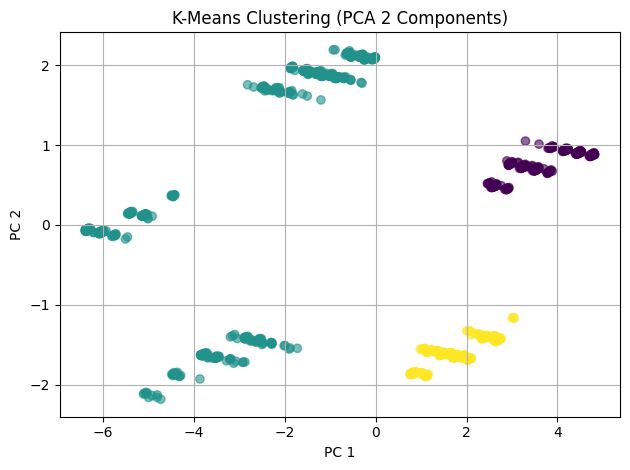

In [19]:
# 2D PCA 결과 시각화
plt.figure()
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=model2.labels_, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (PCA 2 Components)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.tight_layout()
plt.show()



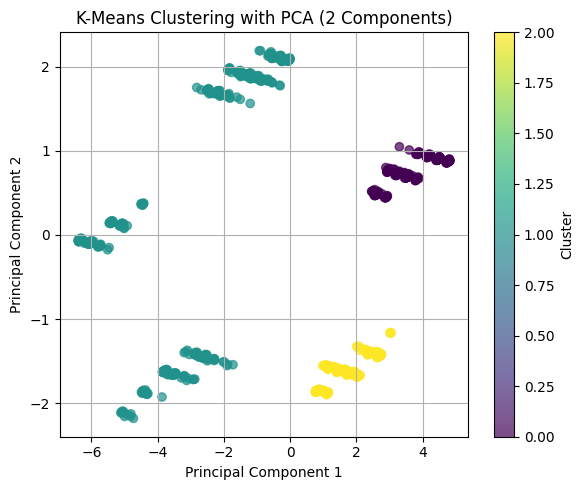

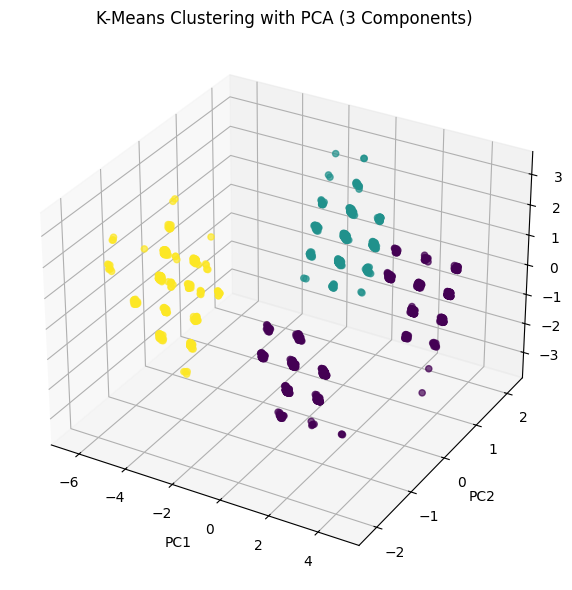

📊 PCA 후 클러스터링 결과 SSE (Sum of Squared Errors)
▶ PCA(2개) → SSE: 4725.38
▶ PCA(3개) → SSE: 4046.40
▶ PCA(4개) → SSE: 4433.41


In [20]:
# KMeans 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 1. 주성분 2개(PCA2)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=model2.labels_, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# 2. 주성분 3개(PCA3)
# 3D 시각화를 위해 필요
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=model3.labels_, cmap='viridis', alpha=0.7)
ax.set_title('K-Means Clustering with PCA (3 Components)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()

# 3. 주성분 4개(PCA4)
# 시각화는 어려우므로 클러스터링 성능 확인용으로 SSE 출력
sse2 = model2.inertia_
sse3 = model3.inertia_
sse4 = model4.inertia_

print("📊 PCA 후 클러스터링 결과 SSE (Sum of Squared Errors)")
print(f"▶ PCA(2개) → SSE: {sse2:.2f}")
print(f"▶ PCA(3개) → SSE: {sse3:.2f}")
print(f"▶ PCA(4개) → SSE: {sse4:.2f}")


# **과제 3번**
**강화학습 알고리즘**을 사용하여 GYM 라이브러리의 환경을 학습해봅시다.


*   **강화학습 환경**: OpenAI Gym에서 제공하는 환경(자유 선택)
*   **예시**: MountainCar, Acrobot, FrozenLake 등
*   **과제 내용**


1.   OpenAI Gym 라이브러리에서 제공하는 환경에는 어떤 것들이 있는지 조사해보고, 원하는 환경을 선택합니다.
2.   선택한 강화학습 환경의 상태, 액션, 보상, 종료 조건을 알아봅니다.
3.   선택한 강화학습 환경을 불러와 실습 코드에서 만든 코드를 사용해 학습합니다.



```
# This is formatted as code
```

## **강화학습 설명** (이 텍스트 블록을 더블클릭해서 아래의 빈칸에 선택한 환경을 설명해주세요.)


1.   강화학습 환경 이름: (MountainCar)
2.   상태: (차량의 위치와 속도)
3.   액션: (3가지 이산적 행동이 있음 0: 왼쪽으로 가속 1: 가속하지 않음 2: 오른쪽으로 가속        )
4.   보상: ( 모든 시간 단계에서 -1의 보상이 주어짐 목표 지점에 도달하면 에피소드가 종료됨 → 즉, 빠르게 도달할수록 누적 보상이 높음 )
5.   종료 조건: (다음 중 하나가 발생하면 에피소드가 종료됩니다. 종료: 차량의 위치가 0.5 이상(오른쪽 언덕 꼭대기의 목표 위치)인 경우 잘림: 에피소드의 길이는 200입니다.)


## 1. 환경 불러오기
선택한 강화학습 환경을 불러옵니다.

In [21]:
# Box2D 제외, classic_control만 설치
!pip install gymnasium[classic_control] pyvirtualdisplay pillow --quiet

In [22]:
# 강화학습 환경 불러오기
from pyvirtualdisplay import Display
import gymnasium as gym
from PIL import Image

# MountainCar-v0 환경을 불러옵니다
env = gym.make("MountainCar-v0", render_mode="rgb_array")


# MountainCar-v0 환경을 초기화합니다
state = env.reset()

## 2. 강화학습 알고리즘 학습
강화학습 코드를 사용하여 선택한 환경을 학습합니다.


In [37]:
# 강화학습 코드
num_episode = 20

# 아래의 for문을 완성해주세요.
for i_episode in range(num_episode):

    # 강화학습 환경을 초기화합니다
    observation, info = env.reset()

    # 하나의 에피소드동안 총 100번의 타임스텝이 진행됩니다
    for _ in range(100):

        # 강화학습 환경을 렌더링합니다
        env.render()

        # 이번 타임스텝에 수행할 액션을 선택합니다
        action = env.action_space.sample()

        # 환경의 상태 변화 및 보상을 계산합니다
        observation, reward, terminated, truncated, info = env.step(action)

        # 종료 조건 확인
        done = terminated or truncated
        if done:
            print("에피소드 {}는 {} 타임스텝에 종료됩니다".format(i_episode + 1, t + 1))
            break


# 강화학습 환경을 종료합니다
env.close()


## 3. 시각화
아래의 시각화 코드를 사용하여 학습한 강화학습 환경을 렌더링합니다.

In [38]:
# 가상 디스플레이 설정
display = Display(visible=0, size=(1400, 900))
display.start()

    # 강화학습 환경을 렌더링할 스크린을 생성합니다
env = gym.make("MountainCar-v0", render_mode="rgb_array")

# 시뮬레이션 실행 및 렌더링 저장
images = []

# 강화학습 환경을 초기화합니다
obs, info = env.reset()
# 총 200번의 타임스텝동안 학습을 반복합니다
for t in range(200):
    # 액션을 선택합니다
    action = env.action_space.sample()
    # 환경의 상태 변화 및 보상을 계산합니다
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # 짝수번쨰의 타임스텝일 때마다 진행상황을 렌더링합니다
    if t % 2 == 0:
        frame = env.render()
        # 해당 타임스텝을 렌더링한 스크린을 이미지로 변환하여 배열에 저장합니다
        images.append(Image.fromarray(frame))
    # 종료 조건이 만족될 경우 에피소드를 종료합니다
    if done:
        break

In [39]:

# 아래의 입력칸에 선택한 환경을 입력합니다
env = gym.make("MountainCar-v0", render_mode="rgb_array")

# 렌더링 GIF를 생성하고 저장합니다
images[0].save(
    'MountainCar-v0.gif', save_all=True, append_images=images[1:],
    loop=0, duration=1)
# --> 저장된 이미지는 코랩 왼쪽 바의 폴더 그림(파일 창)을 누르면 확인 가능함

# 강화학습 환경을 종료합니다
env.close()